In [2]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(transform_output="pandas")
from preprocessing_93 import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter('ignore')
RSEED = 5

from scipy.cluster.hierarchy import dendrogram, linkage

## Preprocessing

In [3]:
df = pd.read_csv("data/AQUASTAT_complete.csv")

In [4]:
pre_split_processor = get_pre_split_processor_93()
df_pre = pre_split_processor.fit_transform(df)

In [5]:
df_pre = df_pre.query("year > 1992")

In [6]:
full_preprocessor = get_full_preprocessor_93(df_pre.columns.to_list(), hot=False)

df_pro = full_preprocessor.fit_transform(df_pre)

In [7]:
df_pro.head()

,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_total_country_area_cultivated,agricultural_water_withdrawal,agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,agricultural_water_withdrawal_as_%_of_total_water_withdrawal,agriculture_value_added_%_gdp,cultivated_area_arable_land_plus_permanent_crops,dam_capacity_per_capita,dependency_ratio,groundwater_accounted_inflow,...,total_renewable_water_resources_per_capita,total_water_withdrawal,total_water_withdrawal_per_capita,urban_population,water_resources_total_external_renewable,country,year,gdp_per_capita,water_stress,total_population_with_access_to_safe_drinking_water
29,0.42963,-0.106528,1.105174,1.001781,1.317100,2.337318,0.734579,0.251313,0.084084,-0.087237,...,-0.096457,0.973941,1.605272,-0.264962,-0.202617,Afghanistan,1993,179.839036,61.906480,21.4
30,0.42963,-0.121301,1.096506,0.993103,1.315969,2.639310,0.726701,0.243083,0.084084,-0.087237,...,-0.136904,0.962895,1.462471,-0.220348,-0.202617,Afghanistan,1994,100.444869,60.475171,21.4
31,0.42963,-0.128683,1.087626,0.984213,1.314784,2.473168,0.722750,0.236760,0.084084,-0.087237,...,-0.226799,0.951585,1.347776,-0.183809,-0.202617,Afghanistan,1995,152.221868,59.043863,21.5
32,0.42963,-0.128807,1.078526,0.975102,1.313539,2.411257,0.722684,0.232441,0.084084,-0.087237,...,-0.189200,0.939998,1.260279,-0.155988,-0.202617,Afghanistan,1996,141.607370,57.612555,23.3
33,0.42963,-0.124127,1.069192,0.965757,1.312230,2.368001,0.725190,0.229608,0.084084,-0.087237,...,-0.203122,0.928119,1.191977,-0.134623,-0.202617,Afghanistan,1997,151.085927,56.181246,25.0


In [8]:
#### Splitting the years

In [9]:
df_90 = df_pro[df_pro['year'] < 2001]
df_00 = df_pro[df_pro['year'].between(2001,2010)]
df_10 = df_pro[df_pro['year'].between(2011,2020)]

In [10]:
df_90['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000], dtype=int64)

In [11]:
# Group the data by country
df_pro_com = df_pro.groupby('country').mean().reset_index()
df_pro_com.head(10)

,country,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_total_country_area_cultivated,agricultural_water_withdrawal,agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,agricultural_water_withdrawal_as_%_of_total_water_withdrawal,agriculture_value_added_%_gdp,cultivated_area_arable_land_plus_permanent_crops,dam_capacity_per_capita,dependency_ratio,...,total_renewable_groundwater,total_renewable_water_resources_per_capita,total_water_withdrawal,total_water_withdrawal_per_capita,urban_population,water_resources_total_external_renewable,year,gdp_per_capita,water_stress,total_population_with_access_to_safe_drinking_water
0,Afghanistan,0.429630,-0.112936,1.064577,0.961136,1.302179,1.629894,0.731157,0.197706,0.084084,...,0.135825,-0.361997,0.923657,0.825113,0.099912,-0.202617,2006.5,339.557140,55.522527,40.703571
1,Albania,0.429630,0.647816,-0.169636,0.007421,-0.048517,0.956919,-0.512250,0.504118,-0.505430,...,0.001826,0.370841,-0.402242,0.118463,-0.750315,-0.257835,2006.5,2882.937682,7.673583,95.632143
2,Algeria,0.429630,-1.090292,0.503603,1.028990,0.110733,0.017425,0.758367,0.297528,-0.748162,...,-0.346865,-1.412399,0.423175,-0.470469,0.910222,-0.268523,2006.5,3243.014455,99.424548,87.178571
3,Angola,-2.835104,-1.126102,-0.668594,-1.073887,-0.952153,-0.258967,0.394532,0.357423,-0.858488,...,0.555619,0.205165,-0.695563,-1.521227,0.507738,-0.268597,2006.5,2429.465346,1.777295,46.982143
4,Argentina,0.429630,-0.120600,1.142951,0.090925,0.496920,-0.419239,1.468326,0.602085,1.341370,...,0.751682,0.792510,1.157768,0.908125,1.200286,1.897976,2006.5,9246.514458,9.423177,97.392857
5,Armenia,0.429630,0.224779,0.170328,0.843906,0.346690,0.799090,-0.681920,0.389831,-0.479390,...,-0.088176,-0.341164,-0.061224,0.908883,-0.581305,-0.266704,2006.5,2350.615983,51.587942,95.928571
6,Australia,0.429630,-1.123184,0.862321,0.020865,0.217889,-0.956458,1.332684,0.613758,-0.867417,...,0.609174,0.820100,0.863678,0.928911,0.777095,-0.270081,2006.5,41327.314780,6.834146,100.000000
7,Austria,0.429630,0.248058,-0.922747,-1.091898,-1.760581,-1.282439,-0.139384,0.326169,0.100394,...,-0.006295,0.332652,0.088941,0.135614,-0.009797,-0.185844,2006.5,38982.954817,9.770536,100.000000
8,Azerbaijan,0.429630,0.656138,0.758097,0.885759,0.505194,0.062457,0.058946,0.569797,1.670031,...,0.013911,-0.119521,0.670304,1.539056,-0.044975,-0.171520,2006.5,3192.247917,52.866290,79.328571
9,Bahrain,0.429630,-0.658609,-0.724891,1.483934,-0.522457,-1.774063,-3.066628,-2.743422,2.331077,...,-0.992325,-1.957979,-0.973210,0.068378,-1.084002,-0.269666,2006.5,18066.502388,184.610115,99.082143


In [12]:
df_90_com = df_90.groupby('country').mean().reset_index()
df_00_com = df_00.groupby('country').mean().reset_index()
df_10_com = df_10.groupby('country').mean().reset_index()

In [13]:
df_pro_com.shape

(161, 39)

### Label encoding Country


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()
label_encoder.fit(df_pro_com['country'])

df_pro_com['country_encoded'] = label_encoder.transform(df_pro_com['country'])

df_pro_com[['country', 'country_encoded']]

,country,country_encoded
0,Afghanistan,0
1,Albania,1
2,Algeria,2
3,Angola,3
4,Argentina,4
...,...,...
156,Venezuela (Bolivarian Republic of),156
157,Viet Nam,157
158,Yemen,158
159,Zambia,159


In [16]:
df_90_com.drop(['year', 'country'], axis=1, inplace=True)
df_00_com.drop(['year', 'country'], axis=1, inplace=True)
df_10_com.drop(['year', 'country'], axis=1, inplace=True)
df_pro_com.drop(['year', 'country'], axis=1, inplace=True)

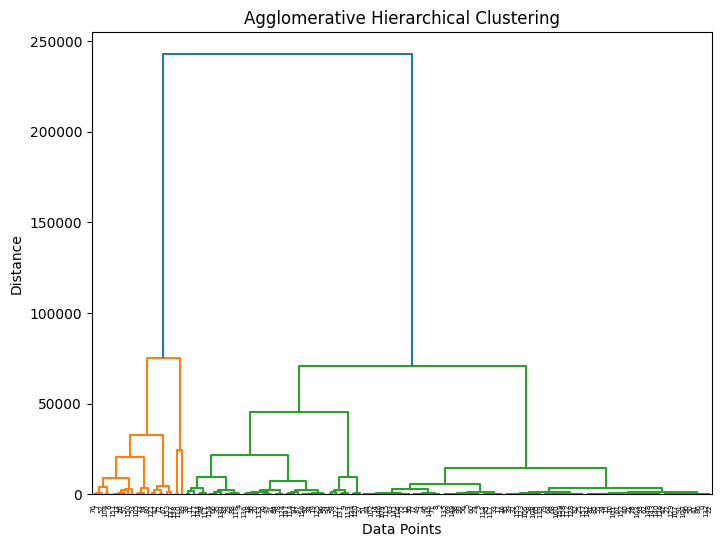

In [25]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
# from sklearn.datasets import load_iris

X = df_pro_com

linked = linkage(X, method='ward')

plt.figure(figsize=(8, 6))
dendrogram(linked, orientation='top', labels=X.country_encoded.to_list(), distance_sort='descending')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

### Agglomerative Clustering

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
# Initialize an empty linkage matrix
combined_linkage_matrix = None

# Initialize an empty list to store country labels
country_labels = []

# Initialize an empty set to store unique_ids and their corresponding rows
unique_id_set = set()

# Iterate through each group (country)
distances = pdist(df_pro_com.select_dtypes(include=['number']), metric='euclidean')

# Create the linkage matrix for the entire dataset
linkage_matrix = linkage(distances, method='weighted')

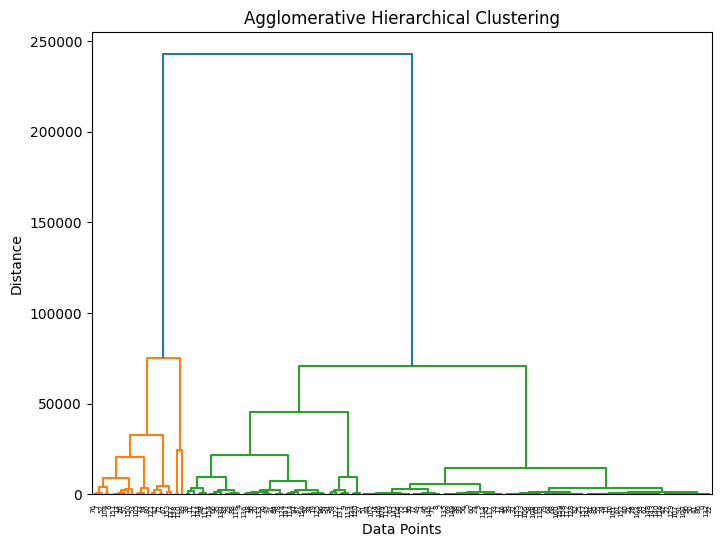

In [32]:
# Initialize an empty linkage matrix
combined_linkage_matrix = None

# Initialize an empty list to store country labels
country_labels = []

# Initialize an empty set to store unique_ids and their corresponding rows
unique_id_set = set()

# Iterate through each group (country)
distances = pdist(X.select_dtypes(include=['number']), metric='euclidean')

# Create the linkage matrix for the entire dataset
linkage_matrix = linkage(distances, method='weighted')

# Assuming df_pro_com contains both numeric and non-numeric columns
# Select only numeric columns for clustering
numeric_data = df_pro_com.select_dtypes(include=['number'])

# Perform hierarchical clustering on the numeric data
linked = linkage(numeric_data, method='ward')


# Plot a dendrogram to visualize the clustering process
plt.figure(figsize=(8, 6))
dendrogram(linked, orientation='top', labels=df_pro_com['country_encoded'].tolist(), distance_sort='descending')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()